Load UMAP Embeddings

📥 Loading UMAP embeddings ...
✅ Shape: (2399, 2)


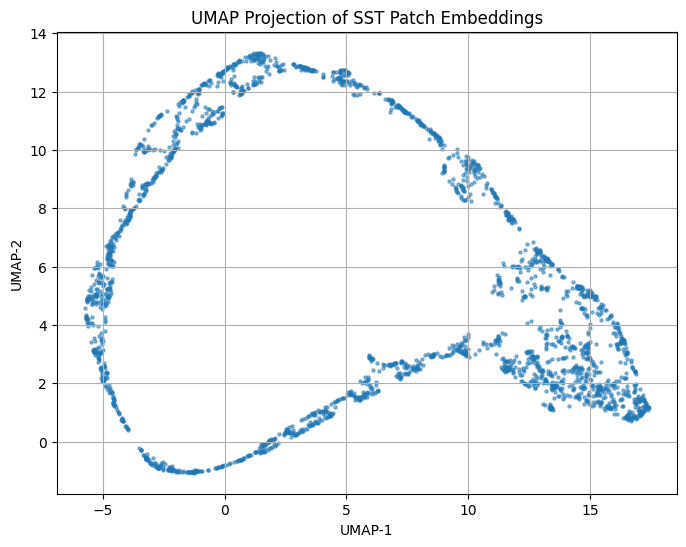

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Define project root assuming notebook is in notebooks/
project_root = Path("..").resolve()
umap_path = project_root / "outputs" / "sst_umap_embeddings.npy"

# Load 2D embeddings
print("📥 Loading UMAP embeddings ...")
embeddings = np.load(umap_path)
print("✅ Shape:", embeddings.shape)

# Quick scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(embeddings[:, 0], embeddings[:, 1], s=5, alpha=0.5)
plt.title("UMAP Projection of SST Patch Embeddings")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.savefig(project_root / "results" / "figures" / "UMAP_rojection_of_SST_Patch_Embeddings.png", dpi=300, bbox_inches="tight")
plt.show()


1. Import libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from pathlib import Path

2. Load the embeddings

In [10]:
project_root = Path("..").resolve()
umap_path = project_root / "outputs" / "sst_umap_embeddings.npy"
embeddings = np.load(umap_path)

3. Run DBSCAN

In [11]:
print("🔎 Clustering with DBSCAN ...")
db = DBSCAN(eps=0.5, min_samples=10)  # You can tweak these
labels = db.fit_predict(embeddings)
print(f"✅ Found {len(set(labels)) - (1 if -1 in labels else 0)} clusters")

🔎 Clustering with DBSCAN ...
✅ Found 4 clusters


4. Plot results

/tmp/ipykernel_228236/1144717743.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base_cmap = get_cmap('tab10')


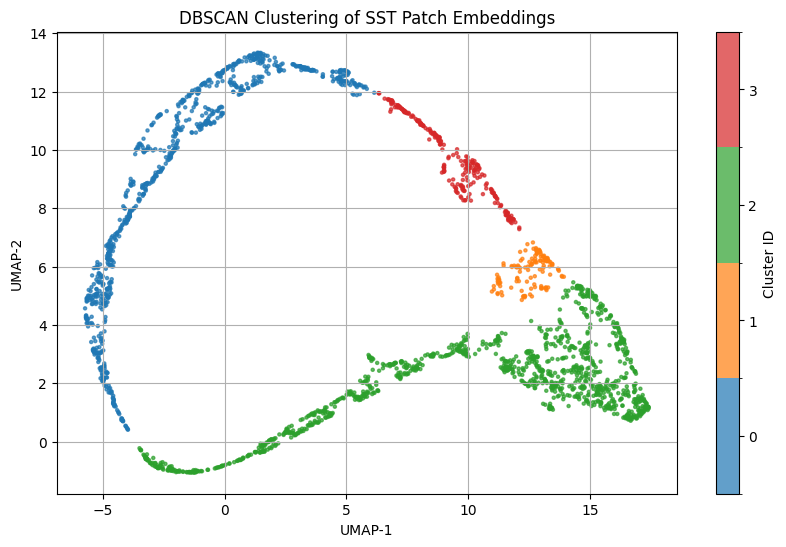

In [15]:
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap, BoundaryNorm

# Remove noise for fair comparison (optional, if you've done so on the map)
mask = labels != -1
labels = labels[mask]
embeddings = embeddings[mask]

# Build colormap exactly like on the map
unique_labels = sorted(set(labels))
base_cmap = get_cmap('tab10')
custom_cmap = ListedColormap(base_cmap.colors[:len(unique_labels)])
bounds = np.arange(len(unique_labels) + 1) - 0.5
norm = BoundaryNorm(bounds, custom_cmap.N)

# Use it in scatter
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    embeddings[:, 0],
    embeddings[:, 1],
    c=labels,
    cmap=custom_cmap,
    norm=norm,
    s=5,
    alpha=0.7
)
plt.title("DBSCAN Clustering of SST Patch Embeddings")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.colorbar(scatter, ticks=unique_labels, label="Cluster ID")
plt.savefig(project_root / "results" / "figures" / "DBSCAN_Clustering_of_SST_Patch_Embeddings.png", dpi=300, bbox_inches="tight")
plt.show()